<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningPython/blob/main/Heat_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A equação da transferência de calor unidimensional é dada por:


> > > $\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}$





onde:

$(T)$ é a temperatura,

$(t)$ é o tempo,

$(x)$ é a posição,

$(\alpha)$ é o coeficiente de difusão térmica.

A discretização da equação utilizando diferenças finitas centradas é dada por:

> > > $
\frac{{T_i^{n+1} - T_i^n}}{{\Delta t}} = \alpha \left(\frac{{T_{i+1}^n - 2T_i^n + T_{i-1}^n}}{{\Delta x^2}}\right)
$

onde:

$(T_i^n)$ é a temperatura no ponto $(i)$ no tempo $(n)$,

$(\Delta t)$ é o tamanho do passo de tempo,

$(\Delta x)$ é o tamanho do intervalo espacial.


Essa é a forma discretizada da equação de transferência de calor unidimensional, que pode ser usada para implementar a solução numérica em um código.

**Condições de Contorno**



> $T[0] = T_{left}$

> $T[N-1] = T_{right}$





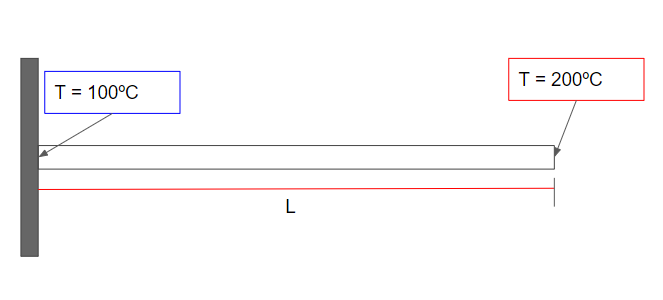

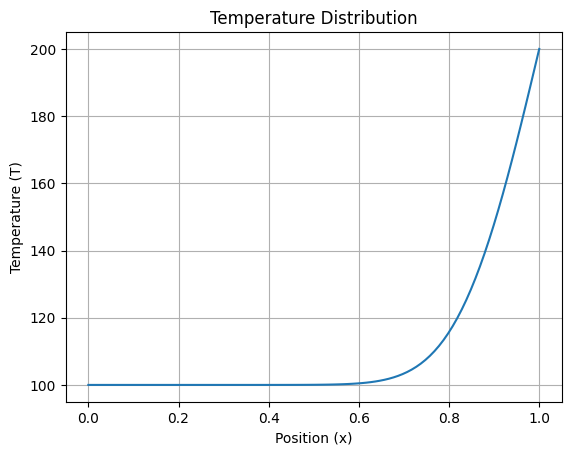

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Length of the rod
alpha = 0.01  # Thermal diffusivity
T_initial = 100.0  # Initial temperature
T_left = 100.0  # Boundary temperature at x = 0
T_right = 200.0  # Boundary temperature at x = L

# Discretization parameters
N = 100  # Number of grid points
dx = L / (N - 1)  # Grid spacing
dt = 0.001  # Time step size
t_final = 1.0  # Final time

# Initialize the temperature array
T = np.ones(N) * T_initial

# Set boundary conditions
T[0] = T_left
T[N - 1] = T_right

# Time-stepping loop
t = 0.0
while t < t_final:
    # Create a copy of the temperature array
    T_new = np.copy(T)

    # Compute the temperature at the interior points
    for i in range(1, N - 1):
        T_new[i] = T[i] + alpha * (dt / dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])

    # Update the temperature array
    T = np.copy(T_new)

    # Increment the time
    t += dt

# Plot the temperature distribution
x = np.linspace(0, L, N)
plt.plot(x, T)
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.title('Temperature Distribution')
plt.grid(True)
plt.show()


*COMENTÁRIOS:*

Com base no gráfico anterior, podemos observar que as condições de contorno foram respeitadas, uma vez que no inicio e no fim do corpo o valor está como o definido pela condição de contorno. Também pode-se observar, que devido ao tempo analisado ter sido curto a temperatura de 200 ainda não foi difundida para todo o domínio do corpo.

### Influência temporal na difusão

No exemplo abaixo, foi avaliado a influência temporal na distribuição de temperatura alongo do corpo.

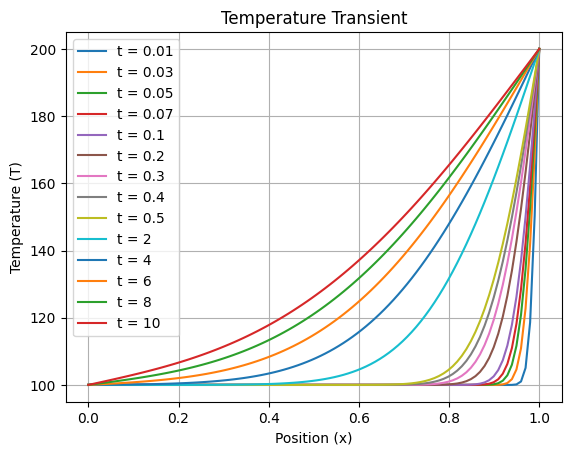

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Length of the rod
alpha = 0.01  # Thermal diffusivity
T_initial = 100.0  # Initial temperature
T_left = 100.0  # Boundary temperature at x = 0
T_right = 200.0  # Boundary temperature at x = L

# Discretization parameters
N = 100  # Number of grid points
dx = L / (N - 1)  # Grid spacing
dt = 0.001  # Time step size
t_final = 10#0.6  # Final time

# Initialize the temperature array
T = np.ones(N) * T_initial

# Set boundary conditions
T[0] = T_left
T[N - 1] = T_right

# Create an array to store temperature profiles at different time steps
time_steps = [0.01, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 2 , 4, 6 , 8 , 10]  # Time steps to plot
temperature_profiles = []

# Time-stepping loop
t = 0.0
while t < t_final:
    # Create a copy of the temperature array
    T_new = np.copy(T)

    # Compute the temperature at the interior points
    for i in range(1, N - 1):
        T_new[i] = T[i] + alpha * (dt / dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])

    # Update the temperature array
    T = np.copy(T_new)

    # Check if the current time step matches any of the desired time steps for plotting
    if np.isclose(t, time_steps).any():
        temperature_profiles.append(np.copy(T))  # Store the temperature profile

    # Increment the time
    t += dt

# Plot the temperature profiles at different time steps
x = np.linspace(0, L, N)
for i, profile in enumerate(temperature_profiles):
    plt.plot(x, profile, label=f"t = {time_steps[i]}")

plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.title('Temperature Transient')
plt.legend()
plt.grid(True)
plt.show()

*COMENTÁRIOS:*

Com base no gráfico anterior, podemos observar que a medida que o tempo avança também vemos uma propagação da temperatura ao longo do corpo.

### Influencia da constante de difusividade térmica

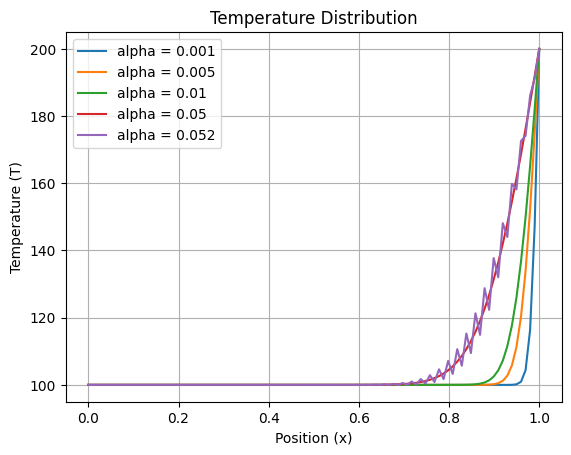

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Length of the rod
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.052]  # Thermal diffusivity values
T_initial = 100.0  # Initial temperature
T_left = 100.0  # Boundary temperature at x = 0
T_right = 200.0  # Boundary temperature at x = L

# Discretization parameters
N = 100  # Number of grid points
dx = L / (N - 1)  # Grid spacing
dt = 0.001  # Time step size
t_final = 0.1  # Final time

# Create an array to store temperature profiles for different alpha values
temperature_profiles = []

for alpha in alpha_values:
    # Initialize the temperature array
    T = np.ones(N) * T_initial

    # Set boundary conditions
    T[0] = T_left
    T[N - 1] = T_right

    # Time-stepping loop
    t = 0.0
    while t < t_final:
        # Create a copy of the temperature array
        T_new = np.copy(T)

        # Compute the temperature at the interior points
        for i in range(1, N - 1):
            T_new[i] = T[i] + alpha * (dt / dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])

        # Update the temperature array
        T = np.copy(T_new)

        # Increment the time
        t += dt

    temperature_profiles.append(np.copy(T))  # Store the temperature profile for the current alpha value

# Plot the temperature profiles for different alpha values
x = np.linspace(0, L, N)
for i, profile in enumerate(temperature_profiles):
    plt.plot(x, profile, label=f"alpha = {alpha_values[i]}")

plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.title('Temperature Distribution')
plt.legend()
plt.grid(True)
plt.show()


*COMENTÁRIOS:*

Com base no gráfico anterior, podemos observar que a medida que aumentamos a constante de difusividade, temos uma propagação do calor de maneira mais répida. No entanto vemos que em 0.52 já começa a apresentar uma instabilidade.

To determine the stability of the numerical solution when using higher values of thermal diffusivity (`alpha`), you can consider the concept of the Courant-Friedrichs-Lewy (CFL) condition. The CFL condition ensures that the time step size (`dt`) is chosen small enough to guarantee numerical stability.

In the case of the difference method used in the 1D heat transfer code, the CFL condition can be expressed as:

$ \alpha \frac{{dt}}{{dx^2}} \leq \frac{1}{2}$

This condition imposes an upper limit on the time step size based on the spatial discretization (grid spacing `dx`) and the thermal diffusivity (`alpha`). If the CFL condition is violated, the numerical solution can become unstable and lead to unphysical results.

To calculate the maximum allowable time step size (`dt_max`) based on the CFL condition, you can rearrange the equation as:

$ dt_{\text{max}} = \frac{1}{2} \frac{{dx^2}}{{\alpha}} $

Then, you can use this `dt_max` value as a reference when choosing the time step size (`dt`) in your code. It is advisable to select a time step size (`dt`) smaller than `dt_max` to ensure stability.

Here's an updated version of the 1D heat transfer code that incorporates the calculation of the maximum allowable time step size based on the CFL condition:



In this updated code, we calculate the maximum allowable time step size (`dt_max`) based on the CFL condition before entering the time-stepping loop. You can adjust the time step size (`dt`) as needed, keeping it smaller than `dt_max`.

By following

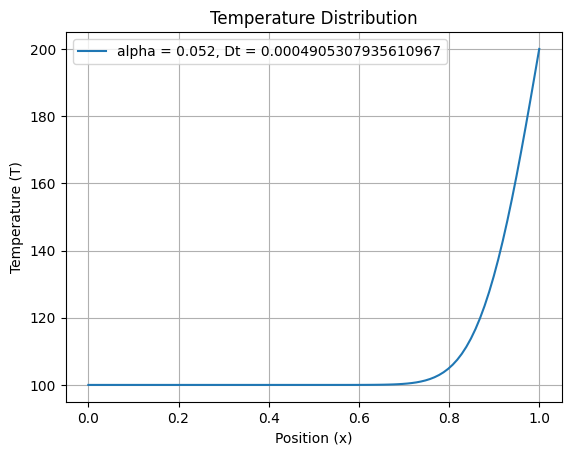

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Length of the rod
alpha = 0.052  # Thermal diffusivity
T_initial = 100.0  # Initial temperature
T_left = 100.0  # Boundary temperature at x = 0
T_right = 200.0  # Boundary temperature at x = L

# Discretization parameters
N = 100  # Number of grid points
dx = L / (N - 1)  # Grid spacing

# Calculate the maximum allowable time step size based on the CFL condition
dt_max = 0.5 * (dx ** 2) / alpha

# Choose a time step size (smaller than dt_max) and final time
dt = dt_max / 2  # Adjust the time step size as needed
t_final = 0.1  # Final time

# Initialize the temperature array
T = np.ones(N) * T_initial

# Set boundary conditions
T[0] = T_left
T[N - 1] = T_right

# Time-stepping loop
t = 0.0
while t < t_final:
    # Create a copy of the temperature array
    T_new = np.copy(T)

    # Compute the temperature at the interior points
    for i in range(1, N - 1):
        T_new[i] = T[i] + alpha * (dt / dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])

    # Update the temperature array
    T = np.copy(T_new)

    # Increment the time
    t += dt

# Plot the temperature distribution
x = np.linspace(0, L, N)
plt.plot(x, T, label=f"alpha = {alpha}, Dt = {dt}")
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.title('Temperature Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Constants
L = 1.0  # Length of the rod
alpha = 0.01  # Thermal diffusivity
T_initial = 100.0  # Initial temperature
T_left = 0.0  # Boundary temperature at x = 0
T_right = 200.0  # Boundary temperature at x = L

# Discretization parameters
N = 100  # Number of grid points
dx = L / (N - 1)  # Grid spacing
dt = 0.001  # Time step size
t_final = 0.1  # Final time

# Initialize the temperature array
T = np.ones(N) * T_initial

# Set boundary conditions
T[0] = T_left
T[N - 1] = T_right

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Plot the initial temperature distribution
x = np.linspace(0, L, N)
line, = ax.plot(x, T)
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.title('Temperature Distribution')

# Animation update function
def update(frame):
    global T

    # Perform the time step
    for _ in range(frame):
        T_new = np.copy(T)
        for i in range(1, N - 1):
            T_new[i] = T[i] + alpha * (dt / dx ** 2) * (T[i + 1] - 2 * T[i] + T[i - 1])
        T = np.copy(T_new)

    # Update the temperature line in the plot
    line.set_ydata(T)

    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=int(t_final / dt), interval=50, blit=True)

# Display the animation as a video
plt.close()
HTML(animation.to_html5_video())




### Example of the Heat transfer in 2D


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Constants
Lx = 1.0  # Length of the rod in x-direction
Ly = 1.0  # Length of the rod in y-direction
alpha = 0.01  # Thermal diffusivity
T_initial = 0.0  # Initial temperature
T_left = 0.0  # Boundary temperature at x = 0
T_right = 200.0  # Boundary temperature at x = Lx
T_top = 0.0  # Boundary temperature at y = Ly
T_bottom = 200.0  # Boundary temperature at y = 0

# Discretization parameters
Nx = 50  # Number of grid points in x-direction
Ny = 50  # Number of grid points in y-direction
dx = Lx / (Nx - 1)  # Grid spacing in x-direction
dy = Ly / (Ny - 1)  # Grid spacing in y-direction
dt = 0.001  # Time step size
t_final = 0.5  # Final time

# Initialize the temperature array
T = np.ones((Ny, Nx)) * T_initial

# Set boundary conditions
T[:, 0] = T_left
T[:, Nx - 1] = T_right
T[0, :] = T_top
T[Ny - 1, :] = T_bottom

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Plot the initial temperature distribution
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
heatmap = ax.pcolormesh(X, Y, T, cmap='hot', shading='auto')
plt.colorbar(heatmap)

# Animation update function
def update(frame):
    global T

    # Perform the time step
    for _ in range(frame):
        T_new = np.copy(T)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                T_new[i, j] = T[i, j] + alpha * (dt / dx ** 2) * (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) \
                              + alpha * (dt / dy ** 2) * (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j])
        T = np.copy(T_new)

    # Update the temperature plot
    heatmap.set_array(T.ravel())

    return heatmap,

# Create the animation
animation = FuncAnimation(fig, update, frames=int(t_final / dt), interval=50, blit=True)

# Display the animation as a video
plt.close()
HTML(animation.to_html5_video())
